In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from scipy.spatial.distance import cdist

import datasets
import preprocessing

### Get data

In [5]:
# BBC corpus
bbc = datasets.get_bbc()

In [5]:
# bbc is a list of strings
type(bbc)

list

In [6]:
type(bbc[0])

str

In [7]:
len(bbc)

2225

In [9]:
# first 100 chars of the 1st doc
bbc[0][:100]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital'

In [10]:
# pre-process and vectorize
processor = preprocessing.NLPProcessor('tf-idf')
bbc_vectorized = processor.fit_transform(bbc)

In [11]:
# sparse matrix
type(bbc_vectorized)

scipy.sparse.csr.csr_matrix

In [12]:
# 2,225 docs with 29,421 sparse features
bbc_vectorized.shape

(2225, 29421)

### Similarity metric

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# cosine similarity between 1st and 2nd doc
cosine_similarity(bbc_vectorized[0], bbc_vectorized[1])

array([[0.09372963]])

In [14]:
# cosine similarity of all 2,225 docs
# in a matrix of 2,225 x 2,225
cosine_similarity(bbc_vectorized)

array([[1.        , 0.09372963, 0.16603523, ..., 0.14290773, 0.23992781,
        0.18738048],
       [0.09372963, 1.        , 0.08616861, ..., 0.04780253, 0.09995931,
        0.08760382],
       [0.16603523, 0.08616861, 1.        , ..., 0.09247675, 0.17008746,
        0.1621905 ],
       ...,
       [0.14290773, 0.04780253, 0.09247675, ..., 1.        , 0.11614638,
        0.08908685],
       [0.23992781, 0.09995931, 0.17008746, ..., 0.11614638, 1.        ,
        0.15640773],
       [0.18738048, 0.08760382, 0.1621905 , ..., 0.08908685, 0.15640773,
        1.        ]])

In [ ]:
# ...

### Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
k = KMeans(n_clusters=5)

In [10]:
# this will take a while
# k.fit(bbc_vectorized)

In [11]:
# take only the top 1,000 most occurring tokens in the corpus 
p = preprocessing.NLPProcessor(max_features=1000)
bbc_vectorized_features_bound = p.fit_transform(bbc)

In [12]:
bbc_vectorized_features_bound.shape

(2225, 1000)

In [13]:
%%time
k.fit(bbc_vectorized_features_bound)

CPU times: user 1min 17s, sys: 393 ms, total: 1min 17s
Wall time: 26.1 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
k.predict(bbc_vectorized_features_bound)

array([2, 4, 0, ..., 2, 2, 0], dtype=int32)

In [94]:
# ...

### Interactive

In [6]:
import interactive

In [54]:
k = 5  # start with assuming there are 10 clusters
options = (1.1, 25, 0.01, 0)
userU = -1
docs = 1000

In [55]:
p = preprocessing.NLPProcessor(max_features=1000)
bbc_vectorized_features_bound = p.fit_transform(bbc)

In [56]:
data = bbc_vectorized_features_bound[:docs].todense()
terms = np.array(p.vec.get_feature_names()).reshape((1, 1000))

In [57]:
# run the algo with no user input
x = interactive.icluster(data, terms, [], k, userU=-1)
clusterDocs, clusterKeyterms, keyterms, silhouette_avg = x

/anaconda3/lib/python3.6/site-packages/scipy/cluster/vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


In [58]:
# sample docs in clusters 0 to k-1
[x[:5] for x in clusterDocs]

[[3, 4, 8, 9, 15],
 [3, 5, 20, 21, 22],
 [2, 6, 7, 14, 29],
 [1, 3, 5, 10, 11],
 [12, 13, 16, 19, 20]]

In [59]:
# there seem to be some legitimate clusters forming
# some overlap
# and some catchall cluster for all common words (need stop word removal?)
[x[:5] for x in clusterKeyterms]

[['win', 'cup', 'side', 'game', 'coach'],
 ['users', 'using', 'broadband', 'online', 'microsoft'],
 ['election', 'party', 'labour', 'tory', 'tories'],
 ['film', 'films', 'actor', 'movie', 'tv'],
 ['growth', 'economy', 'analysts', 'shares', 'oil']]

#### Get user input
Specify number of clusters and top terms

In [60]:
user_input = [x[:5] for x in clusterKeyterms]
user_input

[['win', 'cup', 'side', 'game', 'coach'],
 ['users', 'using', 'broadband', 'online', 'microsoft'],
 ['election', 'party', 'labour', 'tory', 'tories'],
 ['film', 'films', 'actor', 'movie', 'tv'],
 ['growth', 'economy', 'analysts', 'shares', 'oil']]

In [61]:
# looks like there are 5 clusters at a first glance
user_input = [
    ['film', 'tv', 'music', 'oscar'],
    ['growth', 'economy', 'stock', 'investor'],
    ['technology', 'web', 'software'],
    ['olympic', 'game', 'cup', 'coach', 'game', 'club'],
    ['law', 'government', 'election', 'blair'],
]

In [62]:
# run it with user input
x = interactive.icluster(data, terms, user_input, len(user_input), userU=+1)
clusterDocs, clusterKeyterms, keyterms, silhouette_avg = x

In [63]:
# seem to be getting better clusters
[x[:5] for x in clusterKeyterms]

[['film', 'her', 'award', 'actress', 'actor'],
 ['growth', 'economy', 'analysts', 'shares', 'its'],
 ['users', 'digital', 'technology', 'broadband', 'microsoft'],
 ['side', 'game', 'cup', 'coach', 'match'],
 ['labour', 'election', 'party', 'secretary', 'mr']]

In [64]:
len(bbc)

2225

In [65]:
sum([len(x) for x in clusterDocs])

1038

In [66]:
[x[:5] for x in clusterDocs]

[[5, 10, 11, 27, 30],
 [12, 13, 16, 19, 20],
 [1, 21, 22, 25, 28],
 [3, 4, 8, 9, 15],
 [2, 6, 7, 14, 17]]

In [67]:
clusterDocs[-1][-1]

998

In [68]:
for k in range(len(clusterDocs)):
    key = ','.join(clusterKeyterms[k][:5])
    sample_doc = bbc[clusterDocs[k][0]][:200]
    print(f'Cluster {k + 1}')
    print(f'Key terms  : {key}')
    print(f'Sample doc : {sample_doc}')
    print('=' * 10)

Cluster 1
Key terms  : film,her,award,actress,actor
Sample doc : howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an  attack mongrel  shows labour is  rattled  by the opposition.  in an upbeat speech
Cluster 2
Key terms  : growth,economy,analysts,shares,its
Sample doc : crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.  freezing
Cluster 3
Key terms  : users,digital,technology,broadband,microsoft
Sample doc : worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made
Cluster 4
Key terms  : side,game,cup,coach,match
Sample doc : yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading

### t-SNE viz

In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from collections import defaultdict

In [26]:
# tsne = TSNE(n_components=2)
# pca = 

In [87]:
# %%time
# t = tsne.fit_transform(data)

CPU times: user 8.44 s, sys: 239 ms, total: 8.68 s
Wall time: 7.48 s


In [69]:
pca = PCA(n_components=2).fit_transform(data)

In [78]:
cluster_data = defaultdict(list)
for i, docs in enumerate(clusterDocs):
    for doc in docs:
        cluster_data[i].append(pca[doc - 1])

In [75]:
color_alpha = 0.5
colors_base = [
    'rgba(47,126,216,{alpha})',
    'rgba(13,35,58,{alpha})',
    'rgba(139,188,33,{alpha})',
    'rgb(145,0,0,{alpha})',
    'rgba(26,173,206,{alpha})',
    'rgba(73,41,112,{alpha})',
    'rgba(242,143,67,{alpha})',
    'rgba(119,161,229,{alpha})',
    'rgba(196,37,37,{alpha})',
    'rgba(166,201,106,{alpha})'
]
colors = [x.format(alpha=0.5) for x in colors_base]

In [81]:
list(pca[0])

[-0.13421496959580123, -0.1135059292107364]

In [83]:
bbc[0][:100]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital'

In [79]:
[
        {
            'name': f'Cluster {k+1}',
            'color': colors[i],
            'data': cluster_data[i]
        }
        for i in range(k)
    ]

[{'name': 'Cluster 5',
  'color': 'rgba(47,126,216,0.5)',
  'data': [array([-0.04795827,  0.20335836]),
   array([-0.00073097,  0.0613096 ]),
   array([-0.00470181,  0.25286271]),
   array([0.18028342, 0.24149838]),
   array([0.06759204, 0.23476393]),
   array([-0.00782531,  0.03989704]),
   array([0.03288112, 0.08699711]),
   array([0.23111764, 0.19148694]),
   array([-0.06395735,  0.03537915]),
   array([0.06743198, 0.35943533]),
   array([0.03734691, 0.00099978]),
   array([0.11197176, 0.06355923]),
   array([0.02503934, 0.00311323]),
   array([0.0713207 , 0.07227086]),
   array([0.12834019, 0.06443302]),
   array([0.01892631, 0.30864893]),
   array([0.01653137, 0.17646389]),
   array([-0.1096734 ,  0.17030593]),
   array([0.01233015, 0.116857  ]),
   array([0.09632979, 0.30676766]),
   array([0.07187254, 0.2865855 ]),
   array([-0.00605383,  0.09037734]),
   array([0.05949188, 0.3027283 ]),
   array([0.17646891, 0.28756828]),
   array([ 0.10370646, -0.03768866]),
   array([0.169754

In [90]:
color = ['red', 'blue', 'green', 'purple', 'yellow'] * 2

In [91]:
color[0]

'red'

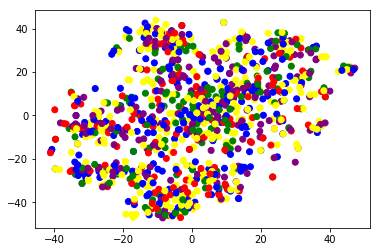

In [92]:
plt.scatter(t[:, 0], t[:, 1], color=[color[int(c)] for c in assignments])

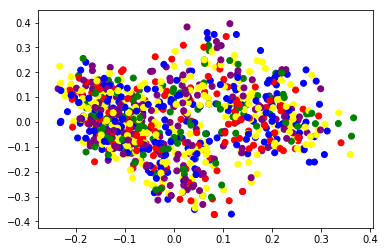

In [96]:
plt.scatter(p[:, 0], p[:, 1], color=[color[int(c)] for c in assignments])